## Example 1: Plotting Cross Sections

To start, import the packages used.  The `ENDFtk` package is Python bindings on the C++ ENDFtk using pybind11.  `patch` improves the interface in Python.  Eventually, we'll clean this up so the Python patching isn't seen by the user.

In [1]:
import matplotlib.pyplot as plt

import ENDFtk
import patch

An input ENDF file (in this case, a 0K reconstructed U-235 file) is read in as an `ENDFtk.Tape` object, using Python's `read` command.  We parse two specific sections in File 3 by decending into the tree for the ENDF material, file, and section, and then calling `parse`.  It takes a few seconds to read the file and make the tree, as this file has 200,000+ energy values.  A typical evaluation file would be nearly instantaneous.

In [2]:
with open('tape22', 'r') as f:
    tape = ENDFtk.Tape(f.read())
capture = tape.materials[0].MF(3).MT(102).parse(3)
fission = tape.materials[0].MF(3).MT(18).parse(3)
elastic = tape.materials[0].MF(3).MT(2).parse(3)

The new parsed section objects have properties including `energies` and `crossSections` which can be used with matplotlib to easily make plots.

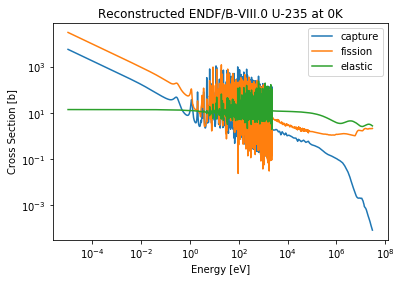

In [3]:
# plot the data
plt.plot(capture.energies, capture.crossSections, label='capture')
plt.plot(fission.energies, fission.crossSections, label='fission')
plt.plot(elastic.energies, elastic.crossSections, label='elastic')

# change appearance of plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Cross Section [b]')
plt.title('Reconstructed ENDF/B-VIII.0 U-235 at 0K')
plt.legend(loc=1)